# Naïve Bayes
## Introduction to Naive Bayes
Naive Bayes is a probabilistic machine learning algorithm based on the Bayes' Theorem, used for classification tasks. it assumes that features in a dataset are mutually independent, which is a strong assumption. 

For each class and feature, the method calculates the mean and variance, which will be used to make probability estimates based on the Gaussian distribution. For each instance to be classified, we calculate the posterior probability for every class using the Bayes formula.
Assume it is independence between features. So, for multiple features, the posterior probability is the product of individual probabilities of each feature. Then we compare the posterior probabilities across classes and assign the class with the highest probability to the instance, and the class with highest probability is our prediction

There are three types of Naive Bayes Classifier: Gaussian, Multinomial, Bernoulli. They share common principles but differ in handling the type of data they are applied to.

Gaussian Naive Bayes: Gaussian is best used in cases where features are continuous and can be assumed to have a Gaussian distribution. It assumes that features follow a normal distribution. Instead of using discrete counts, it uses the mean and variance of the features to estimate the probabilities. If the features are continuous, it assumes that these features are sampled from a Gaussian distribution (bell curve).

Multinomial Naive Bayes: Multinomial is primarily used for document classification problems where the features are related to word counts or frequencies within the documents. This model is based on frequency counts. It calculates the likelihood of each outcome based on the frequency count of the features. The probabilities are then estimated for the new instance using these counts. It can handle the frequency of occurrences of outcomes in a dataset and is particularly useful for text classification.

Bernoulli Naive Bayes: Bernoulli is suitable for datasets where features are binary or boolean, such as text classification where the presence or absence of a feature is more informative than frequency counts. It works similarly to the Multinomial Naive Bayes but with binary variables. It uses the Bernoulli distribution and assumes all our features are binary such that they take only two values.

In [2]:
import pandas as pd

AAPL = pd.read_csv('AAPL_Cleaned.csv')
MSFT = pd.read_csv('MSFT_Cleaned.csv')
GOOGL = pd.read_csv('GOOGL_Cleaned.csv')
AMZN = pd.read_csv('AMZN_Cleaned.csv')
META = pd.read_csv('META_Cleaned.csv')
TSLA = pd.read_csv('TSLA_Cleaned.csv')

In [3]:
AAPL['label'] = (AAPL['close'] > AAPL['close'].shift(1)).astype(int)
MSFT['label'] = (MSFT['close'] > MSFT['close'].shift(1)).astype(int)
GOOGL['label'] = (GOOGL['close'] > GOOGL['close'].shift(1)).astype(int)
AMZN['label'] = (AMZN['close'] > AMZN['close'].shift(1)).astype(int)
META['label'] = (META['close'] > META['close'].shift(1)).astype(int)
TSLA['label'] = (TSLA['close'] > TSLA['close'].shift(1)).astype(int)

In [4]:
from sklearn.model_selection import train_test_split

AAPL = AAPL.dropna()

X = AAPL.drop(['timestamp', 'label'], axis=1)
y = AAPL['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Split data into train and test to ensure that the model can be tuned and evaluated properly. The training set creates the model, the validation set tunes the model’s hyperparameters, and the testing set provides a final metric of how well the model is expected to perform on unseen data.

## Feature Selection for record data

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

AAPL = AAPL.drop('timestamp', axis=1)
AAPL = AAPL.dropna()

X = AAPL.drop('close', axis=1)
y = AAPL['close']

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3) 
selector = rfe.fit(X, y)

selected_features = feature_names[selector.support_]
print("Selected features:")
print(selected_features)

NameError: name 'feature_names' is not defined

## Naïve Bayes (NB) with Labeled Record Data

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gnb = GaussianNB()
model = gnb.fit(X_train, y_train)

val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print(f"Validation Accuracy: {val_accuracy}")
print(classification_report(y_val, val_predictions))

test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Test Accuracy: {test_accuracy}")
print(classification_report(y_test, test_predictions))

confusion_mat = confusion_matrix(y_test, test_predictions)
print(confusion_mat)

Validation Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.62      0.94      0.75        16
           1       0.00      0.00      0.00         9

    accuracy                           0.60        25
   macro avg       0.31      0.47      0.38        25
weighted avg       0.40      0.60      0.48        25

Test Accuracy: 0.44
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        11
           1       0.00      0.00      0.00        14

    accuracy                           0.44        25
   macro avg       0.22      0.50      0.31        25
weighted avg       0.19      0.44      0.27        25

[[11  0]
 [14  0]]


/Users/srongmu/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/srongmu/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/srongmu/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


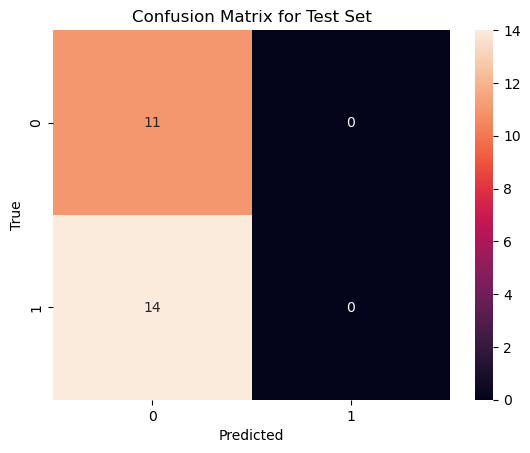

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_predictions) 
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set')
plt.show()

Validation Set Performance:
The model has an accuracy of 60% on the validation set. This means that 60% of the validation set predictions were correct.

Test Set Performance:
The model has a lower accuracy of 44% on the test set. This decrease in accuracy from the validation set suggests that the model may not generalize well to unseen data.

In general, the model is performing poorly, particularly in identifying class 1 instances. This might be due to class imbalance, lack of sufficient predictive features, or model inappropriateness. To improve this, I am trying to find out some other datasets that could help generate a better model and becomes good features.